<a href="https://colab.research.google.com/github/rakshal123/Introduction-To-Tensorflow/blob/main/01_tensorflow_intro_to_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Intoduction To Regression with Neural Networks in TensorFlow

Regression is to predict a numerical value for a variableusing the other features.

In [ ]:
# Import Tensorflow
import tensorflow as tf
tf.__version__

'2.4.1'

# Creating the Data to view and fit

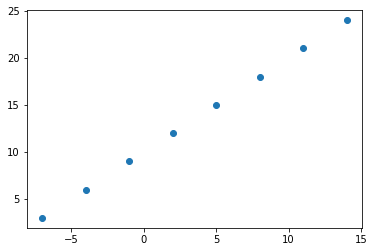

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create the features
X = np.array([-7.0,-4.0,-1.0,2.0,5.0,8.0,11.0,14.0])

# Create the labels
y = np.array([3.0,6.0,9.0,12.0,15.0,18.0,21.0,24.0])

# Visualize it

plt.scatter(X,y)

###INPUT and output shapes

In [ ]:
# Turn the numpy arrays into Tensors

X = tf.constant(X)
y = tf.constant(y)

X,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
input_shape = X[0].shape
output_shape = y[0].shape

input_shape,output_shape

(TensorShape([]), TensorShape([]))

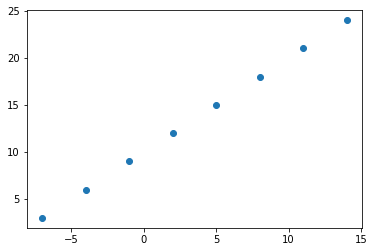

In [ ]:
plt.scatter(X,y)

### Steps in Modelling with TensorFlow

1. **Creating the Model** - define the input and output layers, as well as the hidden layers of the model
2. **Compiling a Model** - define the loss function and optimizer(tells our model how to improve the patterns it is learning) and evaluation metrics(what can we use to interpret the performance of our model).
3. **Fitting a Model** - letting the model try to find patterns between X & y(features and labels).

In [ ]:
# Set the Random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([tf.keras.layers.Dense(1)])

#2. Compile the model
model.compile(steps_per_execution=1,loss = tf.keras.losses.mae, # mae is Mean Absolute error
              optimizer = tf.keras.optimizers.SGD(), #short for stochastic gradient descent
              metrics = ["mae"])

#3. Fit the Model
model.fit(X,y,epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 477ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 3ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 4ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 5ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 4ms/step - loss: 10.9748 - mae: 10.9748


In [ ]:
model.predict(X)

array([[-5.16542  ],
       [-2.9302402],
       [-0.69506  ],
       [ 1.54012  ],
       [ 3.7753   ],
       [ 6.0104804],
       [ 8.245661 ],
       [10.480841 ]], dtype=float32)

### Improving our Model
We can improve our model by altering the steps we take in creating the model-

1. **Creating a Model** - here we might add more layers, increase the number of hidden units(all called neurons)within each of the hidden layers, change the activation function of each layer.
2. **Compiling a Model** - here we might change the optimization function or perhaps the **learning rate** of the optimization function.
3. **Fitting a Model**  - here we might fit a model for more **epochs**(leave it training for longer) or more data (give the model more examples to learn from).

In [ ]:
# let's rebuild the model

#1. Create the Model
model = tf.keras.Sequential([
            tf.keras.layers.Dense(100,activation = "relu"),
            tf.keras.layers.Dense(100,activation = "relu"),
            tf.keras.layers.Dense(1)
])

#2. Compile a Model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(lr=0.1),
              metrics=["mae"])

#3. Fit the model
model.fit(X,y,epochs=100)

In [ ]:
model.predict([27.0])

### Evaluating A Model

The way we will go through while making a model is

```
Build a model-> fit it -> evaluate it -> tweak a model -> fit it ->evaluate it ->tweak a model ->fit it -> evaluate it ->tweak it.....
```

When it comes to evaluation we need to **Visualize**

It's a good idea to visualize:
* The data - what data are we working with? What does it look like?
* The model - what does our model looks like
* The training of the Model - how does the model performs when it learns
* The prediction of the Model - how does the prediction model line up against the ground truth(the original labels)?


 



In [ ]:
X = tf.cast(tf.range(-100,100,4),dtype=tf.float32)
X

In [ ]:
y = X+10
y

In [ ]:
# Visualize the Data
plt.scatter(X,y)

### Three Sets

* Training Set
* Validation Set - get tuned on this data(model is tweaked om this data)
* Test Set - Model gets evaluated on this data


In [ ]:
# Split the data into train and test sets
X_train = X[:40]# first samples are training samples
y_train = y[:40]
X_test = X[40:]
y_test = y[40:]

### Visualize the Data

Now we have our data in training and tests sets...now we must visualize our data

In [ ]:
plt.figure(figsize=(10,7))
# Plot training data in blue
plt.scatter(X_train,y_train,c="b",label = "Training Data")
# Plot the Test Data in green
plt.scatter(X_test,y_test,c="g",label="Testing Data")
# Show a legend
plt.legend()

In [ ]:
# Lets have a look at how to create a neural Network for our data

#1. Create a model
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(100,activation="relu"),
                             tf.keras.layers.Dense(1)
])

#2. Compile the Model
model.compile(loss = tf.keras.losses.mse,
              optimizer = tf.keras.optimizers.Adam(lr=0.1),
              metrics = ["mse"])

#3. Fit in the Model
model.fit(X_train,y_train,epochs=100)

In [ ]:
model.summary()

Trainable Parameters - these are the parameters (patterns)the model can update as it trains

In [ ]:
# If we have to visualize our model

from tensorflow.keras.utils import plot_model

plot_model(model=model,show_shapes=True)

### Visualizing Our Model Prediction
To visualize our Model Prediction,it's a good idea to plot them against the ground truth(y_pred vs y_test)

In [ ]:
# Make some Prediction

y_pred = model.predict(X_test)
y_pred

In [ ]:
y_test

In [ ]:
# Make a pred/plot function

def plot_predictions(train_data=X_train,
                      train_labels=y_train,
                      test_data=X_test,
                      test_labels=y_test,
                      predictions=y_pred):
  """
  Plot Training Data, Test Data and compare the predictions to the ground reality
  """
  plt.figure(figsize=(10,7))
  #Plot the training data in blue
  plt.scatter(train_data,train_labels,c="b",label="Training Data")
  #Plot the test data in green
  plt.scatter(test_data,test_labels,c="g",label="Testing Data")
  # Plot the predicted data in red
  plt.scatter(test_data,predictions,c="r",label="Prediction Data")
  #Plot legends
  plt.legend()
plot_predictions(X_train,y_train,X_test,y_test,y_pred)

### Evaluating our model's prediction using regression evaluation metrics

Depending on the problem working on there will be different evaluation metrics to evaluate our model's performance

Since we are working on regresion, the two of the main metrics are:
* MAE : Mean Absolute error
* MSE : Mean Square Error

In [ ]:
# Evaluate the model on test set
model.evaluate(X_test,y_test)

In [ ]:
# Calcluate the mean absolute error

y_pred-y_test#This output is comming because the shapes are different

In [ ]:
y_pred = tf.constant(y_pred)
y_pred.shape,y_test.shape

In [ ]:
# in order to take out the mean absolute error metric we need to mke their shapes same
y_pred = tf.squeeze(y_pred)
y_pred.shape,y_test.shape 

In [ ]:
mae = tf.metrics.mean_absolute_error(y_true=y_test,y_pred=y_pred)
mae

<tf.Tensor: shape=(), dtype=float32, numpy=0.5934807>

In [ ]:
# Let's make some function to reuse MAE and MSE
def mae(y_true,y_pred):
  return tf.metrics.MAE(y_true=y_true,y_pred=tf.squeeze(y_pred))

def mse(y_true,y_pred):
  return tf.metrics.MSE(y_true = y_true,y_pred = tf.squeeze(y_pred))


### Running Experiments to improve our Model

1. Get more Data
2. Make your model larger(using more complex models)
3. Train for longer

Let's use three Models:

1. `model_1`- the same as the original model, 1 layer, trained for 100 epochs.
2. `model_2`- 2 layers ,trained for 100 epochs
3. `model_3`- 2 layers, trained for 500 epochs

In [ ]:
X_train,y_train

(<tf.Tensor: shape=(40,), dtype=float32, numpy=
 array([-100.,  -96.,  -92.,  -88.,  -84.,  -80.,  -76.,  -72.,  -68.,
         -64.,  -60.,  -56.,  -52.,  -48.,  -44.,  -40.,  -36.,  -32.,
         -28.,  -24.,  -20.,  -16.,  -12.,   -8.,   -4.,    0.,    4.,
           8.,   12.,   16.,   20.,   24.,   28.,   32.,   36.,   40.,
          44.,   48.,   52.,   56.], dtype=float32)>,
 <tf.Tensor: shape=(40,), dtype=float32, numpy=
 array([-90., -86., -82., -78., -74., -70., -66., -62., -58., -54., -50.,
        -46., -42., -38., -34., -30., -26., -22., -18., -14., -10.,  -6.,
         -2.,   2.,   6.,  10.,  14.,  18.,  22.,  26.,  30.,  34.,  38.,
         42.,  46.,  50.,  54.,  58.,  62.,  66.], dtype=float32)>)

In [ ]:
# Build model_1

# set the random seed
tf.random.set_seed(42)

# create the Model

model = tf.keras.Sequential([
                             tf.keras.layers.Dense(1)
])

#2. Compile the Model

model.compile(loss = tf.keras.losses.MAE,
              optimizer = tf.keras.optimizers.SGD(),
              metrics=["mae"])
#Fit the model

model.fit(X_train,y_train,epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 7ms/step - loss: 16.4124 - mae: 16.4124
Epoch 2/100
2/2 [==============================] - 0s 5ms/step - loss: 11.0829 - mae: 11.0829
Epoch 3/100
2/2 [==============================] - 0s 3ms/step - loss: 11.1242 - mae: 11.1242
Epoch 4/100
2/2 [==============================] - 0s 3ms/step - loss: 8.6945 - mae: 8.6945
Epoch 5/100
2/2 [==============================] - 0s 3ms/step - loss: 9.8003 - mae: 9.8003
Epoch 6/100
2/2 [==============================] - 0s 3ms/step - loss: 9.5263 - mae: 9.5263
Epoch 7/100
2/2 [==============================] - 0s 3ms/step - loss: 8.4102 - mae: 8.4102
Epoch 8/100
2/2 [==============================] - 0s 3ms/step - loss: 9.1449 - mae: 9.1449
Epoch 9/100
2/2 [==============================] - 0s 3ms/step - loss: 19.4932 - mae: 19.4932
Epoch 10/100
2/2 [==============================] - 0s 3ms/step - loss: 9.6061 - mae: 9.6061
Epoch 11/100
2/2 [==============================] - 0s 3ms/step - loss:

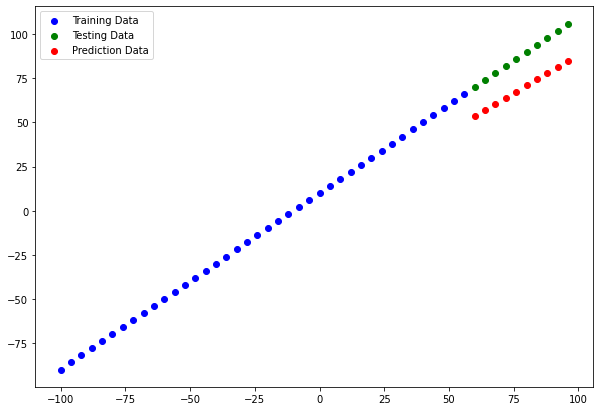

In [ ]:
# Make and plot predictions for model_1
y_pred_1 = model.predict(X_test)
plot_predictions(predictions=y_pred_1)

In [ ]:
# Calculate the evaluation Metrics

mae_1 = mae(y_test,y_pred_1)
mse_1 = mse(y_test,y_pred_1)

mae_1,mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=18.745327>,
 <tf.Tensor: shape=(), dtype=float32, numpy=353.57336>)

In [ ]:
# Build model_2

model_2 = tf.keras.Sequential([
                               tf.keras.layers.Dense(10),
                               tf.keras.layers.Dense(1)
])
model_2.compile(loss=tf.keras.losses.MAE,
                optimizer = tf.keras.optimizers.SGD(),
                metrics=["mae"])
model_2.fit(X_train,y_train,epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 5ms/step - loss: 77.0856 - mae: 77.0856
Epoch 2/100
2/2 [==============================] - 0s 4ms/step - loss: 17.0775 - mae: 17.0775
Epoch 3/100
2/2 [==============================] - 0s 5ms/step - loss: 20.1814 - mae: 20.1814
Epoch 4/100
2/2 [==============================] - 0s 3ms/step - loss: 12.5192 - mae: 12.5192
Epoch 5/100
2/2 [==============================] - 0s 3ms/step - loss: 14.1468 - mae: 14.1468
Epoch 6/100
2/2 [==============================] - 0s 3ms/step - loss: 11.6317 - mae: 11.6317
Epoch 7/100
2/2 [==============================] - 0s 3ms/step - loss: 12.8263 - mae: 12.8263
Epoch 8/100
2/2 [==============================] - 0s 2ms/step - loss: 11.2822 - mae: 11.2822
Epoch 9/100
2/2 [==============================] - 0s 2ms/step - loss: 41.5593 - mae: 41.5593
Epoch 10/100
2/2 [==============================] - 0s 3ms/step - loss: 27.6300 - mae: 27.6300
Epoch 11/100
2/2 [==============================] - 0s 3ms/

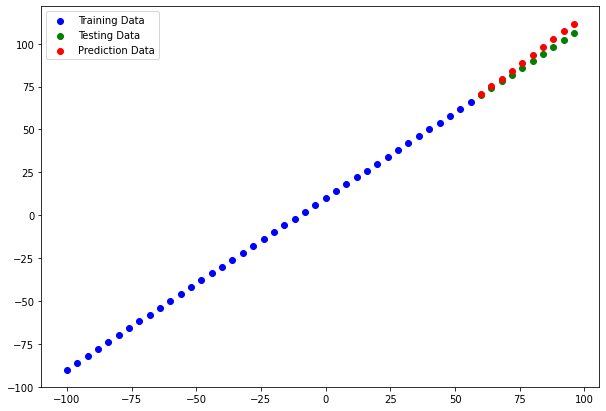

In [ ]:
y_pred_2 = model_2.predict(X_test)

plot_predictions(predictions=y_pred_2)

In [ ]:
mae_2 = mae(y_test,y_pred_2)
mse_2 = mse(y_test,y_pred_2)
mae_2,mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=3.1109948>,
 <tf.Tensor: shape=(), dtype=float32, numpy=12.497052>)

In [ ]:
# Build third Model

model_3 = tf.keras.Sequential([
                               tf.keras.layers.Dense(100),
                               tf.keras.layers.Dense(1)
])

model_3.compile(loss = tf.keras.losses.MAE,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])
model_3.fit(X_train,y_train,epochs=500)

Epoch 1/500
2/2 [==============================] - 0s 7ms/step - loss: 41.4177 - mae: 41.4177
Epoch 2/500
2/2 [==============================] - 0s 3ms/step - loss: 32.0698 - mae: 32.0698
Epoch 3/500
2/2 [==============================] - 0s 5ms/step - loss: 30.0433 - mae: 30.0433
Epoch 4/500
2/2 [==============================] - 0s 2ms/step - loss: 15.2807 - mae: 15.2807
Epoch 5/500
2/2 [==============================] - 0s 3ms/step - loss: 22.8485 - mae: 22.8485
Epoch 6/500
2/2 [==============================] - 0s 6ms/step - loss: 11.1903 - mae: 11.1903
Epoch 7/500
2/2 [==============================] - 0s 3ms/step - loss: 12.4170 - mae: 12.4170
Epoch 8/500
2/2 [==============================] - 0s 3ms/step - loss: 11.1360 - mae: 11.1360
Epoch 9/500
2/2 [==============================] - 0s 3ms/step - loss: 40.6650 - mae: 40.6650
Epoch 10/500
2/2 [==============================] - 0s 4ms/step - loss: 26.8762 - mae: 26.8762
Epoch 11/500
2/2 [==============================] - 0s 3ms/

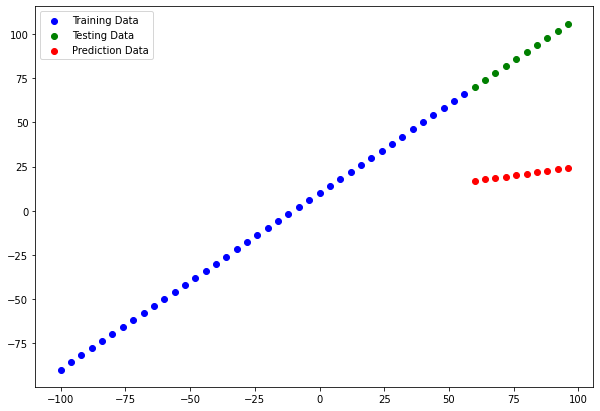

In [ ]:
y_pred_3 = model_3.predict(X_test)

#Plot the predictions
plot_predictions(predictions=y_pred_3)

In [ ]:
mae_3 = mae(y_test,y_pred_3)
mse_3 = mse(y_test,y_pred_3)

mae_3,mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=67.42993>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4630.3647>)

### Compairing the results of our expermiments

In [ ]:
# Let's compare results using pandas DataFrames

import pandas as pd

model_results = [["Model_1",mae_1.numpy(),mse_1.numpy()],
                 ["Model_2",mae_2.numpy(),mse_2.numpy()],
                 ["Model_3",mae_3.numpy(),mse_3.numpy()]]

all_results = pd.DataFrame(model_results,columns=["Model","mae","mse"])
all_results

,Model,mae,mse
0,Model_1,18.745327,353.573364
1,Model_2,3.110995,12.497052
2,Model_3,67.429932,4630.364746


In [ ]:
model_2.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


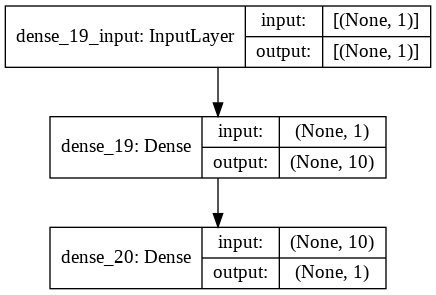

In [ ]:


plot_model(model_2,show_shapes=True)

### Saving our Models

This allows us to use them outside colab.

In [ ]:
model_2.save("my_model")

INFO:tensorflow:Assets written to: my_model/assets
